<a href="https://colab.research.google.com/github/Shantnu-Talokar/ML_Lab_ShantnuTalokar/blob/main/ML_Practical7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier

In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

df = pd.read_csv(url, names=columns)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Features and Target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Random Forest (Bagging approach)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("📌 Random Forest (Bagging)")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

📌 Random Forest (Bagging)
Accuracy: 0.7207792207792207
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [6]:
# AdaBoost with Decision Tree base
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)

print("📌 AdaBoost")
print("Accuracy:", accuracy_score(y_test, ada_pred))
print(classification_report(y_test, ada_pred))

📌 AdaBoost
Accuracy: 0.7792207792207793
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        99
           1       0.68      0.73      0.70        55

    accuracy                           0.78       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.78      0.78      0.78       154



In [7]:
# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

print("📌 Gradient Boosting")
print("Accuracy:", accuracy_score(y_test, gb_pred))
print(classification_report(y_test, gb_pred))


📌 Gradient Boosting
Accuracy: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [8]:
# Create a simple table
results = pd.DataFrame({
    'Model': ['Random Forest', 'AdaBoost', 'Gradient Boosting'],
    'Accuracy': [
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, ada_pred),
        accuracy_score(y_test, gb_pred)
    ]
})
print(results)


               Model  Accuracy
0      Random Forest  0.720779
1           AdaBoost  0.779221
2  Gradient Boosting  0.746753


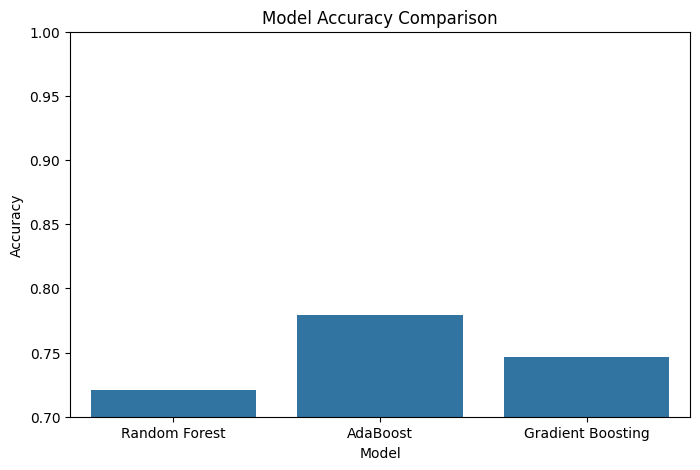

In [9]:
# Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=results)
plt.ylim(0.7, 1.0)
plt.title("Model Accuracy Comparison")
plt.show()
